In [2]:
import pandas as pd


vle = pd.read_csv("studentVle.csv")
info = pd.read_csv("studentInfo.csv")

print(" studentVle shape:", vle.shape)
print("studentInfo shape:", info.shape)


vle.head()


 studentVle shape: (10655280, 6)
studentInfo shape: (32593, 12)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [3]:
vle['week'] = (vle['date'] // 7).astype(int)
weekly_xp = vle.groupby(['id_student', 'week'])['sum_click'].sum().reset_index()

print(" Weekly XP shape:", weekly_xp.shape)
weekly_xp.head()

# Compute weekly XP per student

 Weekly XP shape: (584911, 3)


,id_student,week,sum_click
0,6516,-4,110
1,6516,-3,48
2,6516,-2,2
3,6516,-1,96
4,6516,0,229


In [4]:
xp_pivot = weekly_xp.pivot(index='id_student', columns='week', values='sum_click')

xp_pivot.columns = [f'xp_week_{int(col)}' for col in xp_pivot.columns]

xp_pivot = xp_pivot.reset_index().fillna(0)

print(" XP wide format shape:", xp_pivot.shape)
xp_pivot.head()

#  Pivot to wide format (xp_week_0, xp_week_1, ..., xp_week_44)
# Rename columns
# Reset index and fill missing XP with 0

 XP wide format shape: (26074, 44)


,id_student,xp_week_-4,xp_week_-3,xp_week_-2,xp_week_-1,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,...,xp_week_29,xp_week_30,xp_week_31,xp_week_32,xp_week_33,xp_week_34,xp_week_35,xp_week_36,xp_week_37,xp_week_38
0,6516,110.0,48.0,2.0,96.0,229.0,42.0,79.0,193.0,69.0,...,90.0,55.0,54.0,119.0,79.0,67.0,0.0,0.0,0.0,2.0
1,8462,0.0,0.0,0.0,81.0,81.0,156.0,9.0,23.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11391,0.0,0.0,0.0,98.0,183.0,20.0,100.0,0.0,26.0,...,0.0,43.0,35.0,0.0,15.0,85.0,7.0,1.0,0.0,0.0
3,23629,0.0,0.0,0.0,14.0,23.0,5.0,9.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23698,0.0,4.0,87.0,90.0,25.0,140.0,6.0,13.0,4.0,...,34.0,105.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [13]:
avg_score_df = student_assessment.groupby('id_student')['score'].mean().reset_index()
avg_score_df.rename(columns={'score': 'final_score'}, inplace=True)

# ✅ Step 5: Merge XP data with scores
xp_features_df = pd.merge(
    xp_pivot,
    avg_score_df,
    on='id_student',
    how='left'
)

# ✅ Step 6: Assign grade-based labels
xp_features_df['label'] = xp_features_df['final_score'].apply(
    lambda x: 'A' if pd.notna(x) and x >= 75 else
              'B' if pd.notna(x) and x >= 60 else
              'C' if pd.notna(x) and x >= 0 else
              'D'
)

print("✅ Final labeled dataset shape:", xp_features_df.shape)
print(xp_features_df[['id_student', 'final_score', 'label']].head(20))

✅ Final labeled dataset shape: (26074, 46)
    id_student  final_score label
0         6516    61.800000     B
1         8462    87.000000     A
2        11391    82.000000     A
3        23629    82.500000     A
4        23698    74.444444     B
5        23798    93.909091     A
6        24186    62.500000     B
7        24213    76.285714     A
8        24391    88.888889     A
9        24734    46.800000     C
10       25107    77.363636     A
11       25150    84.250000     A
12       25261    78.000000     A
13       25572    55.000000     C
14       25629          NaN     D
15       25997    86.500000     A
16       26023    88.000000     A
17       26192    86.200000     A
18       26211    89.250000     A
19       26247    88.000000     A


In [14]:
xp_features_df = xp_features_df.dropna(subset=['label'])

print("Final merged XP + label dataset shape:", xp_features_df.shape)
xp_features_df.head()


# Drop rows with missing labels (i.e., missing final_score)
# Final dataset shape


Final merged XP + label dataset shape: (26074, 46)


,id_student,xp_week_-4,xp_week_-3,xp_week_-2,xp_week_-1,xp_week_0,xp_week_1,xp_week_2,xp_week_3,xp_week_4,...,xp_week_31,xp_week_32,xp_week_33,xp_week_34,xp_week_35,xp_week_36,xp_week_37,xp_week_38,final_score,label
0,6516,110.0,48.0,2.0,96.0,229.0,42.0,79.0,193.0,69.0,...,54.0,119.0,79.0,67.0,0.0,0.0,0.0,2.0,61.800000,B
1,8462,0.0,0.0,0.0,81.0,81.0,156.0,9.0,23.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.000000,A
2,11391,0.0,0.0,0.0,98.0,183.0,20.0,100.0,0.0,26.0,...,35.0,0.0,15.0,85.0,7.0,1.0,0.0,0.0,82.000000,A
3,23629,0.0,0.0,0.0,14.0,23.0,5.0,9.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.500000,A
4,23698,0.0,4.0,87.0,90.0,25.0,140.0,6.0,13.0,4.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,74.444444,B


In [15]:
xp_features_df = xp_features_df.loc[:, ~xp_features_df.columns.str.contains('xp_week_-[0-9]+')]

print(" Cleaned XP dataset shape:", xp_features_df.shape)
print("XP columns after removing negative weeks:")
print([col for col in xp_features_df.columns if 'xp_week_' in col])

#  Drop XP columns with negative weeks
# Confirm shape and remaining XP columns

 Cleaned XP dataset shape: (26074, 42)
XP columns after removing negative weeks:
['xp_week_0', 'xp_week_1', 'xp_week_2', 'xp_week_3', 'xp_week_4', 'xp_week_5', 'xp_week_6', 'xp_week_7', 'xp_week_8', 'xp_week_9', 'xp_week_10', 'xp_week_11', 'xp_week_12', 'xp_week_13', 'xp_week_14', 'xp_week_15', 'xp_week_16', 'xp_week_17', 'xp_week_18', 'xp_week_19', 'xp_week_20', 'xp_week_21', 'xp_week_22', 'xp_week_23', 'xp_week_24', 'xp_week_25', 'xp_week_26', 'xp_week_27', 'xp_week_28', 'xp_week_29', 'xp_week_30', 'xp_week_31', 'xp_week_32', 'xp_week_33', 'xp_week_34', 'xp_week_35', 'xp_week_36', 'xp_week_37', 'xp_week_38']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


results_baseline = []

# Loop over weeks (0 to 6 shown — increase as needed)
for week in range(0, 7):  # Change 7 to 45 for full range
    # Create list of XP columns up to current week
    cols = [f'xp_week_{i}' for i in range(week + 1)]
    cols.append('label')  # Add label

    # Subset data
    data_week = xp_features_df[cols].copy()

    # Drop rows with missing label (if any)
    data_week = data_week.dropna(subset=['label'])

    # X = features, y = labels
    X = data_week.drop('label', axis=1)
    y = data_week['label']

    #  No Feature selection (Baseline version)
    X_new = X.copy()  # Use original features directly

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42, stratify=y)

    # Initialize models
    models = {
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results_baseline.append({'Week': week, 'Model': model_name, 'Accuracy': acc})

# Convert results to DataFrame
df_baseline_results = pd.DataFrame(results_baseline)

# Pivot table for better visualization
pivot_baseline = df_baseline_results.pivot(index='Week', columns='Model', values='Accuracy')
print(pivot_baseline)


Model       KNN  Naive Bayes  Random Forest
Week                                       
0      0.414327     0.478294       0.468017
1      0.442706     0.331186       0.405737
2      0.420770     0.325970       0.458966
3      0.440865     0.323516       0.477834
4      0.464949     0.326124       0.491793
5      0.470318     0.335481       0.509281
6      0.480595     0.333333       0.514956


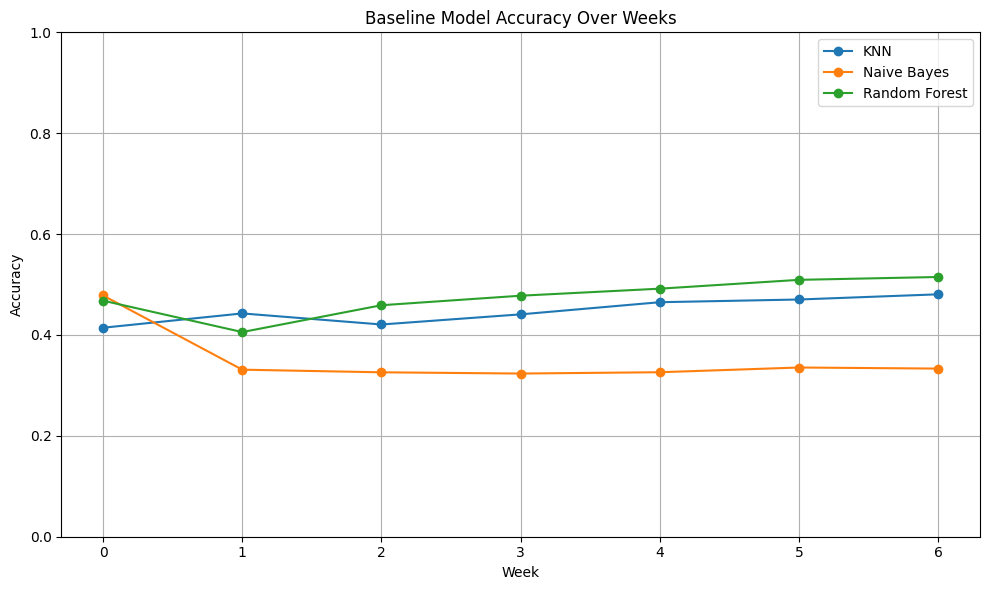

In [17]:
import matplotlib.pyplot as plt

# Plotting baseline results
plt.figure(figsize=(10, 6))
for model in pivot_baseline.columns:
    plt.plot(pivot_baseline.index, pivot_baseline[model], marker='o', label=model)

plt.title('Baseline Model Accuracy Over Weeks')
plt.xlabel('Week')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
